In [1]:
import numpy as np
np.random.seed(123)
import collections, copy, pickle
from importlib import reload
from dateutil.parser import parse
import scipy.linalg, scipy.stats
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
# rcParams['text.usetex'] = True
import seaborn as sns
from IPython.display import HTML

In [2]:
from mlxtend.frequent_patterns import apriori

import sklearn.ensemble
import sklearn.svm
import sklearn.tree
import sklearn.linear_model
import sklearn.neighbors

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
import util.plot
import util.data
import util.string

In [4]:
reload(util.plot)
reload(util.data)

<module 'util.data' from '/Users/mark/stack/doc/school/Data-Mining-Techniques/lab/util/data.py'>

In [5]:
%ls data

encoder.pkl                   test_set_VU_DM_clean.csv
pipeline.pkl                  training_set_VU_DM.csv*
scores_train.csv              training_set_VU_DM_clean.csv
submission_sample.csv*        tuples.csv
test_set_VU_DM.csv*


In [8]:
# sklearn.impute.SimpleImputer()
sklearn.preprocessing.MinMaxScaler()
sklearn.preprocessing.Normalizer()
sklearn.preprocessing.RobustScaler()
sklearn.preprocessing.PowerTransformer()

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [13]:
data = pd.read_csv('data/training_set_VU_DM_clean.csv', sep=';')
# data = pd.read_csv('data/training_set_VU_DM.csv', sep=',', nrows=1000)
test = pd.read_csv('data/test_set_VU_DM.csv', sep=',', nrows=1000)

In [ ]:
# select some row
x = data.iloc[0]
data.loc[data.srch_id == x.srch_id].loc[data.prop_id == x.prop_id]['position'] = 1

In [ ]:
X_test = data
X_test.shape

In [17]:
# data_test = pd.read_csv('data/training_set_VU_DM.csv', sep=',')
# data_test.shape

In [10]:
row = X_test.iloc[0]
row.index

Index(['srch_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_id',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       ...
       'orig_destination_distance_bin1', 'orig_destination_distance_bin2',
       'orig_destination_distance_bin3', 'visitor_hist_adr_usd_bin0',
       'visitor_hist_adr_usd_bin1', 'price_usd_bin0', 'price_usd_bin1',
       'price_usd_bin2', 'price_usd_bin3', 'price_usd_bin4'],
      dtype='object', length=165)

In [16]:
X_test.index, X_test.shape
# for i in range(100):
#     row = X_test.iloc[i]
    

(RangeIndex(start=0, stop=276933, step=1), (276933, 165))

In [24]:
X_test['position_pred'] = pd.Series()
prev_srch_id = -1
for i in range(X_test.shape[0]):
    row = X_test.iloc[i]
    # compute position
    if prev_srch_id != row.srch_id:
        position = 0
        prev_srch_id = row.srch_id
    else:
        position += 1

    # save value to X_test
    X_test.loc[i, 'position_pred'] = position
    # save value to original df
    # data.loc[X_test.srch_id == row.srch_id].loc[X_test.prop_id == row.prop_id]['position_pred'] = position

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
970   NaN
971   NaN
972   NaN
973   NaN
974   NaN
975   NaN
976   NaN
977   NaN
978   NaN
979   NaN
980   NaN
981   NaN
982   NaN
983   NaN
984   NaN
985   NaN
986   NaN
987   NaN
988   NaN
989   NaN
990   NaN
991   NaN
992   NaN
993   NaN
994   NaN
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: new, Length: 1000, dtype: float64

In [8]:
target_columns = [k for k in data.columns if k not in test.columns]
target_columns

['position',
 'click_bool',
 'gross_bookings_usd',
 'booking_bool',
 'score',
 'srch_person_per_room_score',
 'srch_adults_per_room_score',
 'delta_starrating',
 'visitor_hist_adr_usd_log',
 'price_usd_log',
 'has_purch_hist_bool',
 'has_historical_price',
 'unavailable_comp',
 'available_comp',
 'avg_price_comp',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'weekday_Friday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'site_id_label0',
 'site_id_label1',
 'site_id_label2',
 'site_id_label3',
 'site_id_label4',
 'site_id_label5',
 'site_id_label6',
 'site_id_label7',
 'site_id_label8',
 'site_id_label9',
 'visitor_location_country_id_label0',
 'visitor_location_country_id_label1',
 'visitor_location_country_id_label2',
 'visitor_location_country_id_label3',
 'visitor_location_country_id_label4',
 'visitor_location_country_id_label5',
 'visitor_location_country_id_label6',
 'visitor_location_country_id_lab

In [9]:
# pd.read_csv('data/submission_sample.csv', sep=',', nrows=1000).head()

In [10]:
# data.at[0, 'click_bool'] = np.nan
# # df.at['C', 'x'] = 10
# data['click_bool'].isnull().sum()

In [11]:
data.columns

Index(['srch_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_id',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       ...
       'srch_destination_id_label6', 'srch_destination_id_label7',
       'srch_destination_id_label8', 'srch_destination_id_label9',
       'prop_starrating_label0', 'prop_starrating_label1',
       'prop_starrating_label2', 'prop_starrating_label3',
       'prop_starrating_label4', 'prop_starrating_label5'],
      dtype='object', length=115)

In [24]:
data.head(30)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [10]:
data.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,1000.000000,1000.000000,1000.000000,64.000000,64.000000,1000.0000,1000.000000,1000.00000,999.000000,1000.000000,...,33.000000,105.000000,117.000000,45.000000,438.000000,446.000000,111.000000,1000.000000,27.000000,1000.000000
mean,43.014000,12.561000,168.619000,3.376719,226.810781,166.0770,67593.488000,3.21000,3.726226,0.563000,...,18.787879,0.209524,0.102564,26.466667,-0.068493,0.011211,13.693694,0.043000,436.339630,0.027000
std,21.770387,8.794067,70.849033,0.911709,44.996102,75.4622,39079.702354,0.96997,1.082458,0.496263,...,28.883124,0.583346,0.304694,38.143628,0.433033,0.156822,10.872645,0.202959,551.004308,0.162164
min,1.000000,5.000000,31.000000,2.500000,180.750000,15.0000,462.000000,0.00000,0.000000,0.000000,...,3.000000,-1.000000,0.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,47.100000,0.000000
25%,28.000000,5.000000,100.000000,2.500000,180.750000,100.0000,34695.500000,3.00000,3.500000,0.000000,...,9.000000,0.000000,0.000000,9.000000,0.000000,0.000000,7.000000,0.000000,118.315000,0.000000
50%,45.000000,12.000000,219.000000,2.500000,270.080000,219.0000,66274.000000,3.00000,4.000000,1.000000,...,12.000000,0.000000,0.000000,16.000000,0.000000,0.000000,11.000000,0.000000,165.000000,0.000000
75%,63.250000,16.000000,219.000000,4.310000,270.080000,219.0000,99382.000000,4.00000,4.500000,1.000000,...,16.000000,1.000000,0.000000,27.000000,0.000000,0.000000,15.000000,0.000000,509.070000,0.000000
max,78.000000,32.000000,220.000000,4.310000,270.080000,219.0000,140812.000000,5.00000,5.000000,1.000000,...,173.000000,1.000000,1.000000,220.000000,1.000000,1.000000,67.000000,1.000000,1927.640000,1.000000


In [11]:
numerical = [k for k in data.columns if 'comp' not in k and 'id' not in k]
len(numerical)

24

['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']

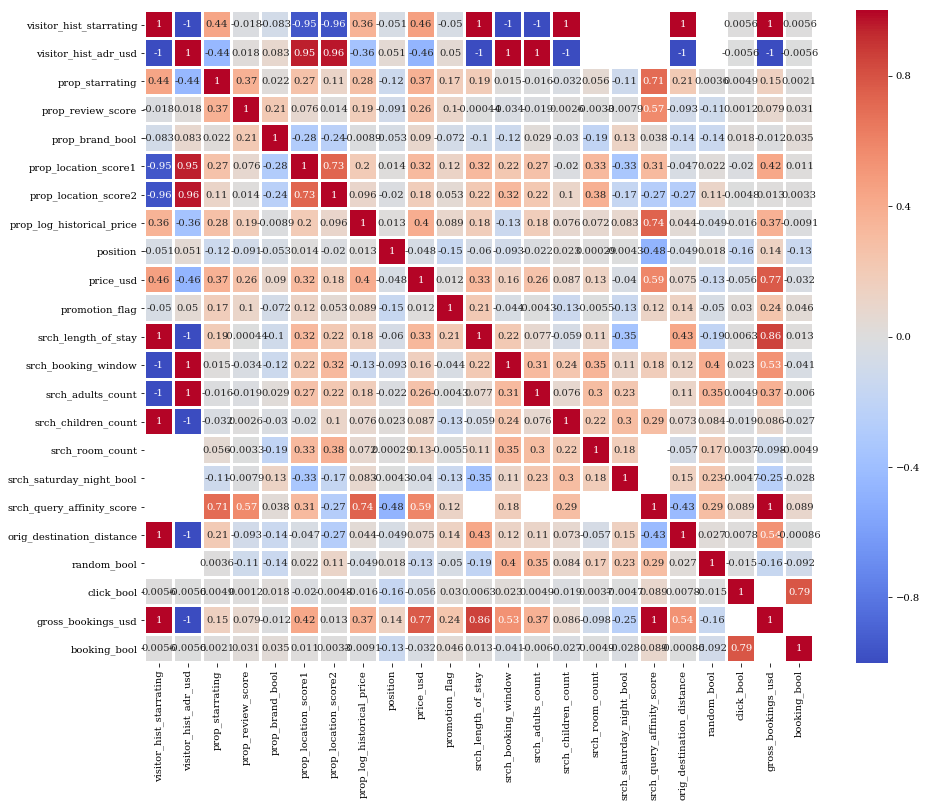

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
# sns.heatmap(data[numerical].corr(), cmap='coolwarm', ax=ax, annot=True, linewidths=2)
sns.heatmap(data[numerical].corr(), cmap='coolwarm', ax=ax, annot=True, linewidths=2, vmin=-1, vmax=1)
target_columns

`booking_bool` and `click_bool` are correlated with each other (and slightly to `position, gross_booking_usd`) (which are all target attributes)

In [13]:
# https://www.kaggle.com/ajay1216/practical-guide-on-data-preprocessing-in-python
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.count()).sort_values(ascending=False)
# data.count()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
comp1_rate,1000,inf
comp1_inv,1000,inf
comp1_rate_percent_diff,1000,inf
gross_bookings_usd,973,36.037037
comp6_rate_percent_diff,967,29.303030
comp4_rate_percent_diff,967,29.303030
comp7_rate_percent_diff,955,21.222222
srch_query_affinity_score,940,15.666667
visitor_hist_adr_usd,936,14.625000
visitor_hist_starrating,936,14.625000


In [14]:
np.array(data.columns.sort_values())[-20:]

array(['prop_id', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'prop_review_score',
       'prop_starrating', 'random_bool', 'site_id', 'srch_adults_count',
       'srch_booking_window', 'srch_children_count',
       'srch_destination_id', 'srch_id', 'srch_length_of_stay',
       'srch_query_affinity_score', 'srch_room_count',
       'srch_saturday_night_bool', 'visitor_hist_adr_usd',
       'visitor_hist_starrating', 'visitor_location_country_id'],
      dtype=object)

In [15]:
# clustering on one-hot encodings of all large id fields?
# or pca

In [16]:
# data[k].isnull()

In [17]:
# Encoders
class E:
    discretizers = {}
    encoders = {}

In [228]:
data_clean = data.copy()
categorical = []

In [229]:
k = 'visitor_location_country_id'
util.data.replace_missing(data_clean, k)
util.data.clean_id(data_clean, k)
util.data.discretize(data_clean, k, E)
categorical.append(k)


clean id in `visitor_location_country_id`
	Combine values
dicretize `visitor_location_country_id`
	Attribute & Number of bins (categories)
	uniform & 10 \\


In [236]:
k = 'visitor_hist_starrating'
util.data.clean_star_rating(data_clean, k)

clean star rating: `visitor_hist_starrating`
	 normalize row


In [239]:
from termcolor import colored
print(colored('a', 'red'))
# print colored('hello', 'red'), colored('world', 'green')

a


In [232]:
def init_encoder(columns):
    E.encoders['x'] = preprocessing.OneHotEncoder(categories='auto')
    enc = E.encoders['x']
    enc.fit(columns)
    return enc.transform(columns)

print('categorical:', categorical)
# keys = [k + ' bin' for k in numerical] + categorical
X_enc = init_encoder(data[categorical])
E.encoders['x'].categories_

categorical: ['visitor_location_country_id']


[array([ 31,  55,  77,  92, 100, 129, 187, 205, 216, 219, 220])]

In [233]:
def init_label_encoder(column):
    E.encoders['y'] = preprocessing.LabelEncoder()
    enc = E.encoders['y']
    enc.fit(column)
    return enc.transform(column)

y = 'click_bool'
Y_enc = init_label_encoder(data[y])
E.encoders['y'].classes_

array([0, 1])

In [22]:
# check class imbalance
'rel amount of clicks', data[y].sum() / data[y].count()

('rel amount of clicks', 0.043)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_enc, Y_enc, test_size=0.5)
x_train.shape, y_train.shape

((500, 11), (500,))

In [24]:
def cross_validation(model_func, x_train, y_train, k=None, results=None, v=0):
    # Train for 5 folds, returing ROC AUC. You can also try 'accuracy' as a scorer
    n_folds = 5
    scores_acc = cross_val_score(model_func, x_train, y_train, cv=n_folds, scoring='accuracy') # roc_auc accuracy
    scores_roc = cross_val_score(model_func, x_train, y_train, cv=n_folds, scoring='roc_auc') # roc_auc accuracy
    if results is not None:
        results[k] = (scores_acc, scores_roc)
    if v:
        print('scores per fold ', scores_acc)
        print('  mean score    ', np.mean(scores_acc))
        print('  standard dev. ', np.std(scores_acc))

In [25]:
seed = 123
models = {
          'Logit': sklearn.linear_model.LogisticRegression(solver='liblinear',
                                                           multi_class='ovr'),
#           'SGD': sklearn.linear_model.SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=1e-3),
#           'SVC auto': sklearn.svm.SVC(gamma='auto'), 
          'SVC': sklearn.svm.SVC(kernel='linear'), 
#           'SVC polynomial': sklearn.svm.SVC(kernel='poly', gamma='auto', degree=4),    
          'Decision Tree':  sklearn.tree.DecisionTreeClassifier(),
          'KNN 5': sklearn.neighbors.KNeighborsClassifier(n_neighbors=5),
#           'KNN 10': sklearn.neighbors.KNeighborsClassifier(n_neighbors=10),
          'Ensemble Random Forest': sklearn.ensemble.RandomForestClassifier(n_estimators=100),
#           'Ensemble Bagging': sklearn.ensemble.BaggingClassifier(n_estimators=100)
            'XGBoost': sklearn.ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, 
                            n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                            max_depth=3,random_state=seed, alpha=0.9, tol=0.0001)    
         }

results = {}
for k,m in models.items():
    print(k)
    cross_validation(m, x_train, y_train, k, results)

Logit
SVC
Decision Tree
KNN 5
Ensemble Random Forest


In [26]:
print('Model & Mean Acc & Std Acc & Mean ROC & Std ROC \\\\ \n\\hline')
best_k = ''
best_mean = 0
for k, (scores_acc, scores_roc) in results.items():
    if np.mean(scores_acc) > best_mean:
        best_mean = np.mean(scores_acc)
        best_k = k
    print('%s & %0.4f & %0.4f & %0.4f & %0.4f\\\\' % (k, np.mean(scores_acc), np.std(scores_acc), np.mean(scores_roc), np.std(scores_roc)))
print('\nbest acc:', best_k, round(best_mean,4))

Model & Mean Acc & Std Acc & Mean ROC & Std ROC \\ 
\hline
Logit & 0.9620 & 0.0038 & 0.4416 & 0.1177\\
SVC & 0.9620 & 0.0038 & 0.5000 & 0.0000\\
Decision Tree & 0.9620 & 0.0038 & 0.3716 & 0.0970\\
KNN 5 & 0.9620 & 0.0038 & 0.4928 & 0.0848\\
Ensemble Random Forest & 0.9620 & 0.0038 & 0.3458 & 0.0993\\

best acc: Logit 0.962


In [27]:
best_k = ''
best_mean = 0
for k, (scores_acc, scores_roc) in results.items():
    if np.mean(scores_roc) > best_mean:
        best_mean = np.mean(scores_roc)
        best_k = k
print('\nbest roc:', best_k, round(best_mean,4))


best roc: SVC 0.5
